<a href="https://colab.research.google.com/github/Harshita-Puthran/factverse/blob/main/factverse_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_parquet("hf://datasets/NickyNicky/global-news-dataset/data/train-00000-of-00001.parquet")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [2]:
print(df.head(100))

    article_id source_id                   source_name  \
0        89541      None  International Business Times   
1        89542      None                    Prtimes.jp   
2        89543      None                      VOA News   
3        89545      None            The Indian Express   
4        89547      None           The Times of Israel   
..         ...       ...                           ...   
95       89702      None                        Forbes   
96       89704      None                     Aajtak.in   
97       89707      None                     The Punch   
98       89710      None                 TheJournal.ie   
99       89714      None                           NPR   

                                               author  \
0                                      Paavan MATHEMA   
1                                                None   
2          webdesk@voanews.com (Agence France-Presse)   
3                                           Editorial   
4                 

In [3]:
df.shape

(105375, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105375 entries, 0 to 105374
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   article_id    105375 non-null  int64 
 1   source_id     24495 non-null   object
 2   source_name   105375 non-null  object
 3   author        97156 non-null   object
 4   title         105335 non-null  object
 5   description   104992 non-null  object
 6   url           105375 non-null  object
 7   url_to_image  99751 non-null   object
 8   published_at  105375 non-null  object
 9   content       105375 non-null  object
 10  category      105333 non-null  object
 11  full_content  58432 non-null   object
dtypes: int64(1), object(11)
memory usage: 9.6+ MB


In [5]:
df.isnull().sum()

,0
article_id,0
source_id,80880
source_name,0
author,8219
title,40
description,383
url,0
url_to_image,5624
published_at,0
content,0


In [6]:
df['source_name'].value_counts().head(10)


,count
source_name,
ETF Daily News,16631
The Times of India,7629
GlobeNewswire,5485
Forbes,4423
Biztoc.com,3968
BBC News,3342
Globalsecurity.org,3093
Business Insider,2746
ABC News,2188


<Axes: xlabel='published_at'>

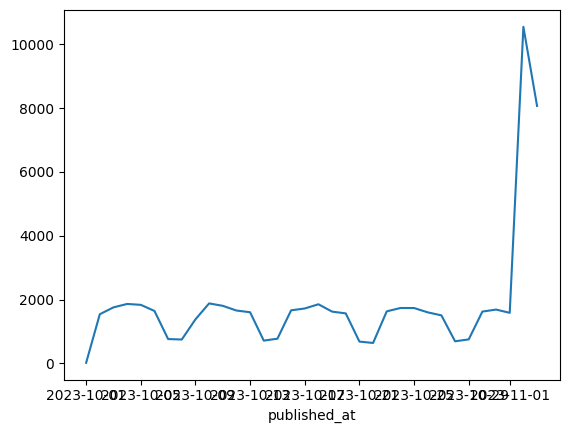

In [7]:

df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')
df['published_at'].dt.date.value_counts().sort_index().plot(kind='line')

In [8]:
#missing value imputation
df['author'].fillna('Unknown', inplace=True)
df['url_to_image'].fillna('NA', inplace=True)

df = df.drop(['source_id'],axis=1)
#drop all columns with missing title since it is important
df = df.dropna(subset=['title'])
# Fill missing description with empty string
df['description'] = df['description'].fillna('')
# Rename category to country
df = df.rename(columns={'category': 'country'})
df['country'] = df['country'].fillna('Unknown')

/tmp/ipython-input-1671358080.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['author'].fillna('Unknown', inplace=True)
/tmp/ipython-input-1671358080.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [9]:
df.head()

,article_id,source_name,author,title,description,url,url_to_image,published_at,content,country,full_content
0,89541,International Business Times,Paavan MATHEMA,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,https://www.ibtimes.com/un-chief-urges-world-s...,https://d.ibtimes.com/en/full/4496078/nepals-g...,2023-10-30 10:12:35,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...
1,89542,Prtimes.jp,Unknown,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,https://prtimes.jp/main/html/rd/p/000000147.00...,https://prtimes.jp/i/32220/147/ogp/d32220-147-...,2023-10-06 04:40:02,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,None
2,89543,VOA News,webdesk@voanews.com (Agence France-Presse),UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,https://www.voanews.com/a/un-chief-urges-world...,https://gdb.voanews.com/01000000-0a00-0242-60f...,2023-10-30 10:53:30,"Kathmandu, Nepal UN Secretary-General Antonio...",Nepal,None
3,89545,The Indian Express,Editorial,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,https://indianexpress.com/article/opinion/edit...,https://images.indianexpress.com/2023/10/edit-...,2023-10-06 01:20:24,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...
4,89547,The Times of Israel,Jacob Magid,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...",https://www.timesofisrael.com/200-foreigners-d...,https://static.timesofisrael.com/www/uploads/2...,2023-10-27 01:08:34,"Scores of foreign citizens were killed, taken ...",Nepal,None


In [10]:
df.isnull().sum()

,0
article_id,0
source_name,0
author,0
title,0
description,0
url,0
url_to_image,0
published_at,42443
content,0
country,0


In [11]:
df['country'].value_counts()

,count
country,
Stock,3999
Health,2594
Finance,2402
Technology,2371
Real estate,2352
...,...
Eritrea,14
Martinique,13
Cabo Verde,11


In [12]:
df = df.rename(columns={'country': 'category'})

In [13]:
pd.set_option("display.max_rows", None)

print(df['category'].value_counts())

category
Stock                                    3999
Health                                   2594
Finance                                  2402
Technology                               2371
Real estate                              2352
Canada                                   2324
News                                     1852
COVID                                    1821
Education                                1771
Food                                     1613
Jobs                                     1562
Weather                                  1495
Travel                                   1451
Cars                                     1289
Science                                  1260
Asia                                     1242
India                                    1196
Music                                    1159
Politics                                 1154
Climate                                  1140
America                                  1134
Fashion                  

In [14]:
print(df['category'].value_counts().head(50))

category
Stock                      3999
Health                     2594
Finance                    2402
Technology                 2371
Real estate                2352
Canada                     2324
News                       1852
COVID                      1821
Education                  1771
Food                       1613
Jobs                       1562
Weather                    1495
Travel                     1451
Cars                       1289
Science                    1260
Asia                       1242
India                      1196
Music                      1159
Politics                   1154
Climate                    1140
America                    1134
Fashion                    1121
Sports                     1106
Artificial Intelligence    1102
Love                       1057
Relationships              1043
Home                       1006
Africa                      995
Australia                   992
Google                      979
Space                       974

In [15]:
#text quality and length
df['title_len'] = df['title'].astype(str).str.len()
df['desc_len'] = df['description'].astype(str).str.len()
df['content_len'] = df['content'].astype(str).str.len()
df[['title_len','desc_len','content_len']].describe()

,title_len,desc_len,content_len
count,105335.000000,105335.000000,105335.000000
mean,72.660189,199.862486,208.981649
std,26.327278,69.241102,23.938623
min,4.000000,0.000000,25.000000
25%,56.000000,143.000000,213.000000
50%,70.000000,243.000000,214.000000
75%,85.000000,260.000000,214.000000
max,583.000000,260.000000,216.000000


In [16]:
df.duplicated(subset=['title','source_name']).sum()

np.int64(5174)

In [26]:
# Drop duplicates based on title + source_name
df = df.drop_duplicates(subset=['title', 'source_name'], keep='first').reset_index(drop=True)

# Check again to confirm
print(df.duplicated(subset=['title', 'source_name']).sum())  # should be 0
print(df.shape)


0
(100161, 15)


In [27]:
# Drop rows where title has more than 150 words
df = df[df['title'].astype(str).apply(lambda x: len(x.split()) <= 150)].reset_index(drop=True)

# Verify
print(df['title'].apply(lambda x: len(str(x).split())).max())  # should be <= 100
print(df.shape)

94
(100161, 15)


In [28]:
#now we have removed some outliers

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# --- Helper function to plot top n-grams ---
def plot_top_ngrams(corpus, n=20, ngram_range=(1,1), title="Top N-grams"):
    vectorizer = CountVectorizer(stop_words='english', ngram_range=ngram_range)
    X = vectorizer.fit_transform(corpus.dropna())
    freqs = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])
    df_freq = pd.DataFrame(freqs, columns=["term","count"]).sort_values(by="count", ascending=False).head(n)

    plt.figure(figsize=(10,6))
    plt.barh(df_freq["term"], df_freq["count"], color="skyblue")
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.show()
